In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile


In [8]:
data = pd.read_csv('D:/Python Code/Machine_Learning/Data/housing_price_train.csv', nrows=50000)
data.shape

(1460, 81)

In [9]:
# Select numerical data 
numerical = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = list(data.select_dtypes(include=numerical).columns)
data = data[numerical_features]
data.shape

(1460, 38)

In [11]:
 # Seperate train, test set 
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=.3,
    random_state=0) 
X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [12]:
# Find mutual information 
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns 
mi.sort_values(ascending=False)

OverallQual      0.526112
GrLivArea        0.479117
TotalBsmtSF      0.382582
GarageCars       0.366289
GarageArea       0.365200
YearBuilt        0.342954
1stFlrSF         0.312376
GarageYrBlt      0.267694
MSSubClass       0.262666
FullBath         0.255657
YearRemodAdd     0.242915
2ndFlrSF         0.220667
LotFrontage      0.209889
TotRmsAbvGrd     0.186726
Fireplaces       0.173863
OpenPorchSF      0.172795
LotArea          0.166359
BsmtFinSF1       0.161662
BsmtUnfSF        0.113104
OverallCond      0.110296
MasVnrArea       0.101493
HalfBath         0.077891
WoodDeckSF       0.068818
BedroomAbvGr     0.054819
KitchenAbvGr     0.029165
EnclosedPorch    0.022639
ScreenPorch      0.020933
BsmtFullBath     0.014796
BsmtHalfBath     0.006146
PoolArea         0.001576
YrSold           0.001398
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
MoSold           0.000000
3SsnPorch        0.000000
MiscVal          0.000000
Id               0.000000
dtype: float64

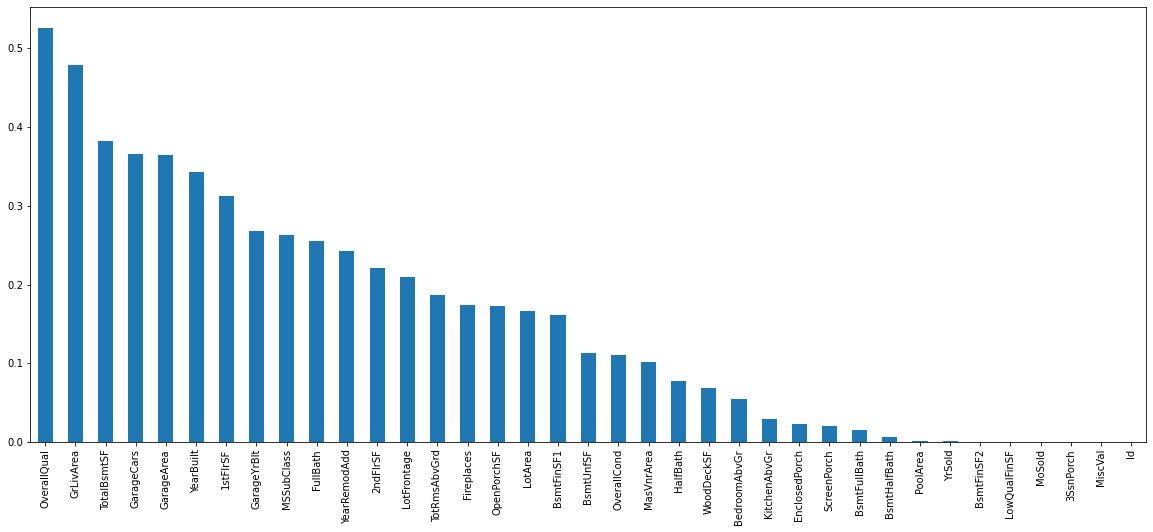

In [13]:
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [35]:
# 50% Information matched 
matching_percent = SelectPercentile(mutual_info_regression, percentile=70).fit(X_train.fillna(0), y_train)
len(X_train.columns[matching_percent.get_support()])

26

In [36]:
X_train.columns[matching_percent.get_support()]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF'],
      dtype='object')